- Regression Loss Functions
    - Squared Error Loss
    - Absolute Error Loss
    - Huber Loss

- Binary Classification Loss Functions
    - Binary Cross-Entropy
    - Hinge Loss

- Multi-class Classification Loss Functions
    - Multi-class Cross Entropy Loss
    - Kullback Leibler Divergence Loss

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop(columns = ["Loan_ID"])

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Gender"].mode()

0    Male
dtype: object

In [7]:
df["Gender"]= df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"]= df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Married"]= df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]= df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [8]:
df["LoanAmount"]= df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]= df["Loan_Amount_Term"].bfill()
df["Credit_History"]= df["Credit_History"].bfill()

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.select_dtypes(include=["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [12]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
x = df.drop(columns = ["Loan_Status"])
y = df["Loan_Status"]

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [18]:
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.fit_transform(xtest)

In [19]:
xtrain.shape

(491, 11)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(25, activation="relu", input_dim = 11))
model.add(Dense(15, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = "mean_squared_error", optimizer ="adam",metrics = "accuracy")

In [22]:
history = model.fit(sc_xtrain,ytrain, epochs= 30, batch_size = 20)

Epoch 1/30
25/25 [==============================] - 1s 2ms/step - loss: 0.3876 - accuracy: 0.3055
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.3884
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.6536
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.7620
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.7747
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.7597
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.8016
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.8028
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.8183
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.7998
Epoch 11/30
25/25 [

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

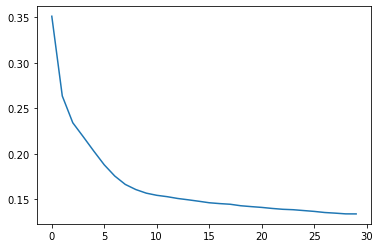

In [24]:
plt.plot(history.history["loss"])

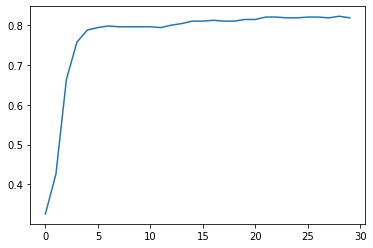

In [25]:
plt.plot(history.history["accuracy"])

In [26]:
loss, acc = model.evaluate(sc_xtrain,ytrain)

16/16 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.8228


In [27]:
loss

0.13148614764213562

In [28]:
acc

0.8228105902671814

### Model 2

In [29]:
from keras.optimizers import SGD

In [30]:
model.compile(loss = "mean_absolute_error", optimizer = SGD(),metrics = "accuracy")

In [31]:
history = model.fit(sc_xtrain,ytrain, epochs= 30, batch_size = 20)

Epoch 1/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8079
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8036
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2468 - accuracy: 0.8325
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.8086
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.8038
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.8391
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.7997
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.8017
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.8287
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2113 - accuracy: 0.8241
Epoch 11/30
25/25 [

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [33]:
loss, acc = model.evaluate(sc_xtrain,ytrain)

16/16 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.8167


In [34]:
loss

0.1963564157485962

In [35]:
acc

0.8167006373405457